<a href="https://colab.research.google.com/github/RiaKokate/GIS/blob/main/ps3_rk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This project aims to assess the health and well-being of New Jersey counties by exploring key factors like life expectancy, population composition, racial demographics, health behaviors, premature death rates, and the number of healthcare providers. Through this analysis, the project seeks to uncover disparities in health outcomes across counties, highlighting differences in healthcare access and identifying areas that may need targeted public health interventions. The ultimate goal is to understand how these variables influence the overall health of communities throughout the state.

In [5]:
import os, zipfile #basics
import pandas as pd #data management
import matplotlib.pyplot as plt #vis
#!pip install geopandas matplotlib folium

import geopandas as gpd #gis/maps

#will display all output not just last command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from google.colab import files #to download from colab onto hd

from google.colab import data_table
data_table.enable_dataframe_formatter() #this enables spreadsheet view upon calling dataframe (without() )

In [6]:
!pip install mapclassify
import mapclassify #need for thematic map classification

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.1/59.1 kB 2.6 MB/s eta 0:00:00


<Axes: >

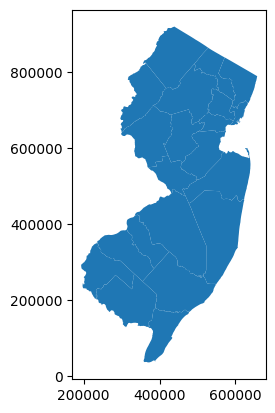

In [7]:
! wget -q -O nj.zip https://drive.google.com/uc?id=1WrAjPi1Ik33B6EI3T7XUWrqe2XV4LiGn&export=Download

zip_ref = zipfile.ZipFile('nj.zip', 'r'); zip_ref.extractall(); zip_ref.close() #just unzipping
nj_counties=gpd.read_file('County_Boundaries_of_NJ.shp') #load the shapefile with gpd as nj_counties

#Make the map
nj_counties.plot()


In [8]:
! wget -q -O pop.xlsx https://drive.google.com/uc?id=1pzMPl4sepUfSTcMfkGNX1cr80iHzQUlo&export=Download

# Now read the Excel file into a DataFrame
nj_pop = pd.read_excel('pop.xlsx', skiprows=3)


In [9]:
#nj_counties.head(3)

In [10]:
nj_pop= nj_pop.dropna()
#nj_pop

In [11]:
nj_pop.drop(0, inplace=True)

In [12]:
nj_pop=nj_pop.round(0)

**New Jersey Population by County **

In [40]:
nj_pop.head(5)

,County_name,base_estimate,2020,2021,2022
1,ATLANTIC,274536,274172,275130,275638
2,BERGEN,955746,953617,954879,952997
3,BURLINGTON,461863,461648,464411,466103
4,CAMDEN,523486,523074,524124,524907
5,CAPE MAY,95266,95040,95768,95634


In [14]:
nj_pop['Unnamed: 1'] = nj_pop['Unnamed: 1'].astype('int')
nj_pop[2020] = nj_pop[2020].astype('int')
nj_pop[2021] = nj_pop[2021].astype('int')
nj_pop[2022] = nj_pop[2022].astype('int')

nj_pop.rename(columns={'Unnamed: 0': 'County_name'}, inplace=True)
nj_pop.rename(columns={'Unnamed: 1': 'base_estimate'}, inplace=True)



In [15]:
nj_pop['County_name'] = nj_pop['County_name'].str.replace('County, New Jersey', '', regex=True)
nj_pop['County_name'] = nj_pop['County_name'].str.replace('^\.', '', regex=True)
nj_pop['County_name'] = nj_pop['County_name'].str.upper()

In [16]:
nj_pop['County_name'] = nj_pop['County_name'].str.lstrip()

In [17]:
nj_pop['County_name'] = nj_pop['County_name'].str.rstrip()

In [18]:
#nj_counties.dtypes

In [19]:
#nj_pop

In [20]:
# Merge shapefile with nj-population data
nj_counties = pd.merge(
    left=nj_counties,
    right=nj_pop,
    left_on='COUNTY',
    right_on='County_name',
    how='outer', indicator=True
)

In [39]:
nj_counties[['COUNTY','County_name','_merge']].head(5)


,COUNTY,County_name,_merge
0,ATLANTIC,ATLANTIC,both
1,BERGEN,BERGEN,both
2,BURLINGTON,BURLINGTON,both
3,CAMDEN,CAMDEN,both
4,CAPE MAY,CAPE MAY,both


In [22]:
#nj_counties.dtypes

In [23]:
!pip install imgkit
!sudo apt-get install wkhtmltopdf
import imgkit

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  avahi-daemon bind9-host bind9-libs geoclue-2.0 glib-networking
  glib-networking-common glib-networking-services gsettings-desktop-schemas
  iio-sensor-proxy libavahi-core7 libavahi-glib1 libdaemon0 libevdev2
  libfontenc1 libgudev-1.0-0 libhyphen0 libinput-bin libinput10
  libjson-glib-1.0-0 libjson-glib-1.0-common liblmdb0 libmaxminddb0
  libmbim-glib4 libmbim-proxy libmd4c0 libmm-glib0 libmtdev1 libnl-genl-3-200
  libnotify4 libnss-mdns libproxy1v5 libqmi-glib5 libqmi-proxy libqt5core5a
  libqt5dbus5 libqt5gui5 libqt5network5 libqt5positioning5 libqt5printsupport5
  libqt5qml5 libqt5qmlmodels5 libqt5quick5 libqt5sensors5 libqt5svg5
  libqt5webchannel5 libqt5webkit5 libqt5widgets5 libsoup2.4-1
  libsoup2.4-common libudev1 libwacom-bin libwacom-common libwacom9 libwoff1
  libxcb-icccm4 libxcb-image0 libxcb-keysyms1 libxcb-render-util0 

<Axes: >

Text(0.5, 1.0, 'Population Distribution in New Jersey (2022)')

(170515.9983667707, 680228.4248388322, -9284.7735595353, 963786.8361332513)

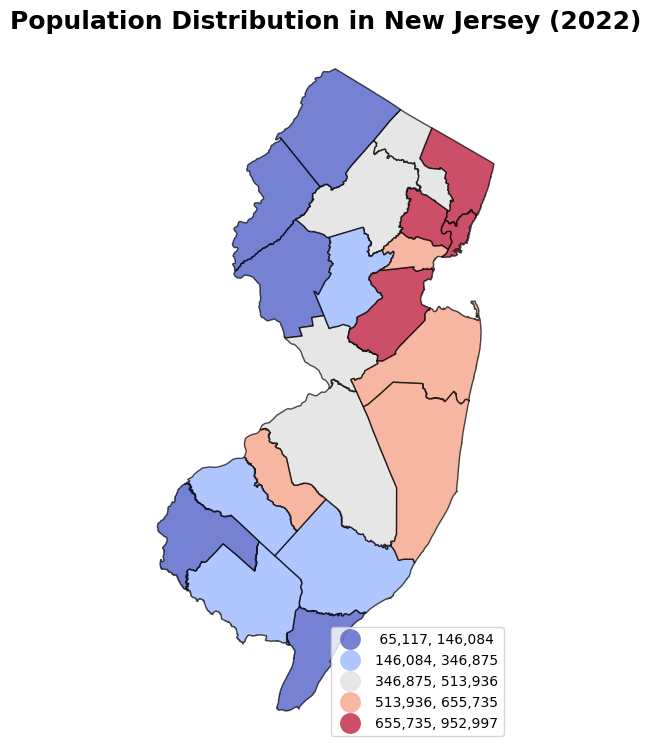

In [57]:
import matplotlib.pyplot as plt
import geopandas as gpd

# Assuming nj_counties is your GeoDataFrame and 2022 is the column with data you want to map

fig, ax = plt.subplots(figsize=(4, 9))  # Increase the size for better clarity

# Plotting the map with a new color scheme and enhanced visual elements
nj_counties.plot(ax=ax, column=2022, legend=True, cmap='coolwarm', scheme='quantiles', k=5,
                 edgecolor='black', linewidth=1, alpha=0.7,  # Adding alpha for transparency and black borders
                 legend_kwds={
                     "fmt": "{:,.0f}",
                     'loc': 'lower right',
                     'title_fontsize': 'large',  # Adjust title font size
                     'fontsize': 'medium',
                     'markerscale': 1.5
                 })

# Set title and modify its appearance
ax.set_title("Population Distribution in New Jersey (2022)", fontsize=18, fontweight='bold', fontname='Arial')

# Remove axis for a cleaner look
plt.axis('off')

# Adjust the layout to ensure the title and legend fit well
plt.tight_layout()

# Show the plot
plt.show()

In [33]:
! wget -q -O AMD.xlsx https://drive.google.com/uc?id=1LK5FMHeKwMnUoASt7dFj1nXmvMolfDIZ&export=Download

# Now read the Excel file into a DataFrame
add_measures = pd.read_excel('AMD.xlsx', skiprows=1)

In [34]:
drop_columns = ['Life Expectancy (AIAN)', 'Life Expectancy (AIAN) 95% CI - Low', 'Life Expectancy (AIAN) 95% CI - High']
add_measures = add_measures.drop(columns = drop_columns)

In [35]:
pd.options.display.float_format = '{:.2f}'.format

In [37]:
add_measures.head(5)

,FIPS,State,County,Life Expectancy,95% CI - Low,95% CI - High,Life Expectancy (Asian),Life Expectancy (Asian) 95% CI - Low,Life Expectancy (Asian) 95% CI - High,Life Expectancy (Black),...,% Hispanic,# Non-Hispanic White,% Non-Hispanic White,# Not Proficient in English,% Not Proficient in English,95% CI - Low.21,95% CI - High.21,% Female,# Rural Residents,% Rural
0,34000,New Jersey,NaN,79.49,79.43,79.55,88.70,88.33,89.07,74.40,...,21.49,4960795,53.53,526627,6.05,5.96,6.14,50.77,467768,5.32
1,34001,New Jersey,Atlantic,76.68,76.33,77.03,89.61,86.35,92.88,71.36,...,19.91,152602,55.50,14679,5.66,5.13,6.19,51.19,34905,12.71
2,34003,New Jersey,Bergen,82.14,81.97,82.31,89.62,88.78,90.47,78.71,...,22.05,511369,53.61,60309,6.68,6.33,7.02,51.01,919,0.10
3,34005,New Jersey,Burlington,79.12,78.87,79.38,87.25,85.48,89.03,76.76,...,9.23,302309,65.12,8032,1.84,1.55,2.13,50.45,29900,6.66
4,34007,New Jersey,Camden,76.69,76.44,76.94,89.50,87.27,91.73,72.22,...,18.50,285709,54.55,21068,4.30,3.95,4.65,51.47,8308,1.62


In [46]:
add_measures.drop(0, inplace=True)

In [48]:
add_measures= add_measures[['County','Life Expectancy','Life Expectancy (Asian)',
'Life Expectancy (Black)', 'Life Expectancy (Hispanic)', 'Life Expectancy (White)', '# Deaths']]
add_measures= add_measures.iloc[0:,:]
add_measures['County'] = add_measures['County'].str.upper()
add_measures.head(5)

,County,Life Expectancy,Life Expectancy (Asian),Life Expectancy (Black),Life Expectancy (Hispanic),Life Expectancy (White),# Deaths
1,ATLANTIC,76.68,89.61,71.36,80.90,76.57,4148
2,BERGEN,82.14,89.62,78.71,84.90,81.15,7666
3,BURLINGTON,79.12,87.25,76.76,84.35,78.96,5362
4,CAMDEN,76.69,89.50,72.22,79.32,77.20,7316
5,CAPE MAY,76.87,NaN,72.22,88.50,76.86,1656


In [49]:
print(add_measures.columns)

Index(['County', 'Life Expectancy', 'Life Expectancy (Asian)',
       'Life Expectancy (Black)', 'Life Expectancy (Hispanic)',
       'Life Expectancy (White)', '# Deaths'],
      dtype='object')


<BarContainer object of 21 artists>

<BarContainer object of 21 artists>

<BarContainer object of 21 artists>

<BarContainer object of 21 artists>

Text(0.5, 1.0, 'Race-Specific Life Expectancy by County')

Text(0.5, 0, 'County')

Text(0, 0.5, 'Life Expectancy (years)')

([<matplotlib.axis.XTick at 0x77fc936acca0>,
 [Text(0.3, 0, 'ATLANTIC'),
  Text(1.3, 0, 'BERGEN'),
  Text(2.3, 0, 'BURLINGTON'),
  Text(3.3, 0, 'CAMDEN'),
  Text(4.3, 0, 'CAPE MAY'),
  Text(5.3, 0, 'CUMBERLAND'),
  Text(6.3, 0, 'ESSEX'),
  Text(7.3, 0, 'GLOUCESTER'),
  Text(8.3, 0, 'HUDSON'),
  Text(9.3, 0, 'HUNTERDON'),
  Text(10.3, 0, 'MERCER'),
  Text(11.3, 0, 'MIDDLESEX'),
  Text(12.3, 0, 'MONMOUTH'),
  Text(13.3, 0, 'MORRIS'),
  Text(14.3, 0, 'OCEAN'),
  Text(15.3, 0, 'PASSAIC'),
  Text(16.3, 0, 'SALEM'),
  Text(17.3, 0, 'SOMERSET'),
  Text(18.3, 0, 'SUSSEX'),
  Text(19.3, 0, 'UNION'),
  Text(20.3, 0, 'WARREN')])

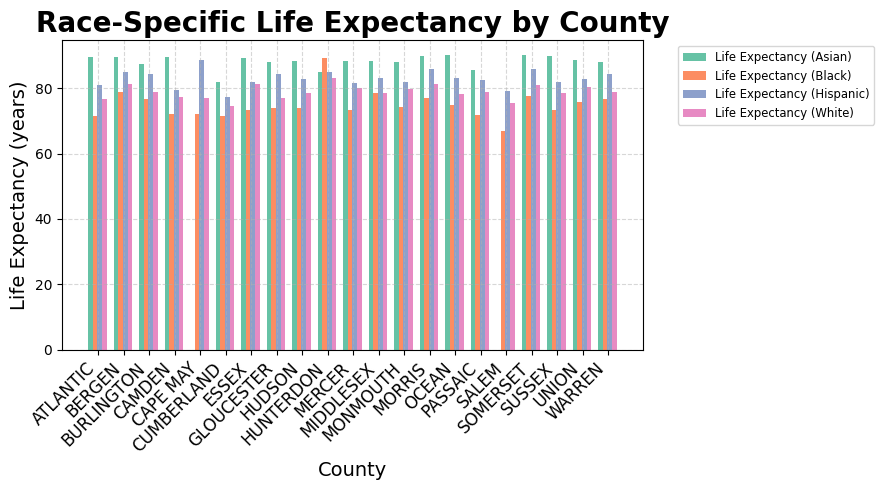

In [72]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Example DataFrame with race-specific life expectancy data
categories = ['Life Expectancy (Asian)', 'Life Expectancy (Black)', 'Life Expectancy (Hispanic)', 'Life Expectancy (White)']
bar_width = 0.18  # Adjust the width of each bar for clarity

# Assuming 'county_data' contains life expectancy for each race
county_indices = np.arange(len(add_measures['County']))
bar_offsets = np.arange(len(categories)) * bar_width

# Create the plot
fig, ax = plt.subplots(figsize=(9, 5))  # Slightly larger figure for clarity

# Seaborn color palette for distinct colors
palette = sns.color_palette("Set2", n_colors=len(categories))

# Loop over each category and plot a separate bar for each race
for idx, category in enumerate(categories):
    ax.bar(county_indices + bar_offsets[idx], add_measures[category], width=bar_width, label=category, color=palette[idx])

# Customize the plot with title, labels, and axis ticks
ax.set_title('Race-Specific Life Expectancy by County', fontsize=20, fontweight='bold', fontname='Arial')
ax.set_xlabel('County', fontsize=14)
ax.set_ylabel('Life Expectancy (years)', fontsize=14)

# Adjust x-tick labels for better readability
plt.xticks(county_indices + 0.3, add_measures['County'], rotation=45, ha='right', fontsize=12)

# Move legend to the right of the plot
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), fontsize='small')

# Add gridlines for better comparison
ax.grid(True, linestyle='--', alpha=0.5)

# Tighten the layout to ensure no overlap
plt.tight_layout()

# Display the plot
plt.show()


In [73]:
import pandas as pd
# Load health provider data and create a heatmap
! wget -q -O provider.csv https://drive.google.com/uc?id=1NzJ60zNWiky6reKAwDRYpZTers2jwCPq&export=Download
health_providers = pd.read_csv('provider.csv')
health_providers['County'] = health_providers['County'].str.replace('County', '', regex=True).str.upper()
health_providers['total_providers'] = (health_providers['Primary Care Physicians (PCP)'] +
                                       health_providers['Mental Health Providers (MHP)'] +
                                       health_providers['Dentists'])

Geo_FIPS                           int64
County                            object
Geo_QNAME                         object
Geo_NATION                         int64
Geo_STATE                          int64
Geo_COUNTY                         int64
Primary Care Physicians (PCP)      int64
Mental Health Providers (MHP)      int64
Dentists                           int64
Rate per 100,000 Population      float64
SE_NV003_002                     float64
SE_NV003_003                     float64
total_providers                    int64
dtype: object
   Geo_FIPS       County                      Geo_QNAME  Geo_NATION  \
0     34001    ATLANTIC     Atlantic County, New Jersey           0   
1     34003      BERGEN       Bergen County, New Jersey           0   
2     34005  BURLINGTON   Burlington County, New Jersey           0   
3     34007      CAMDEN       Camden County, New Jersey           0   
4     34009    CAPE MAY     Cape May County, New Jersey           0   

   Geo_STATE  Geo_COUNTY  

<Figure size 1200x800 with 0 Axes>

<Axes: ylabel='Geo_QNAME'>

Text(0.5, 1.0, 'Healthcare Providers per 100,000 Population by County')

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5]),
 [Text(0.5, 0, 'Geo_FIPS'),
  Text(1.5, 0, 'Geo_NATION'),
  Text(2.5, 0, 'Geo_STATE'),
  Text(3.5, 0, 'Geo_COUNTY'),
  Text(4.5, 0, 'Primary Care Physicians (PCP)'),
  Text(5.5, 0, 'Mental Health Providers (MHP)'),
  Text(6.5, 0, 'Dentists'),
  Text(7.5, 0, 'Rate per 100,000 Population'),
  Text(8.5, 0, 'SE_NV003_002'),
  Text(9.5, 0, 'SE_NV003_003'),
  Text(10.5, 0, 'total_providers')])

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5]),
 [Text(0, 0.5, 'Atlantic County, New Jersey'),
  Text(0, 1.5, 'Bergen County, New Jersey'),
  Text(0, 2.5, 'Burlington County, New Jersey'),
  Text(0, 3.5, 'Camden County, New Jersey'),
  Text(0, 4.5, 'Cape May County, New Jersey'),
  Text(0, 5.5, 'Cumberland County, New Jersey'),
  Text(0, 6.5, 'Essex County, New Jersey'),
  Text(0, 7.5, 'Gloucester County, New Jersey'),
  Text(0, 8.5, 'Hudson County, New Jersey'),
  Text(0, 9.5, 'Hunterdon County, New Jersey'),
  Text(0, 10.5, 'Mercer County, New Jersey'),
  Text(0, 11.5, 'Middlesex County, New Jersey'),
  Text(0, 12.5, 'Monmouth County, New Jersey'),
  Text(0, 13.5, 'Morris County, New Jersey'),
  Text(0, 14.5, 'Ocean County, New Jersey'),
  Text(0, 15.5, 'Passaic County, New Jersey'),
  Text(0, 16.5, 'Salem County, New Jersey'),
  Text(0, 17.5, 'Somerset County, New Jersey'),
  Text(0, 18.5

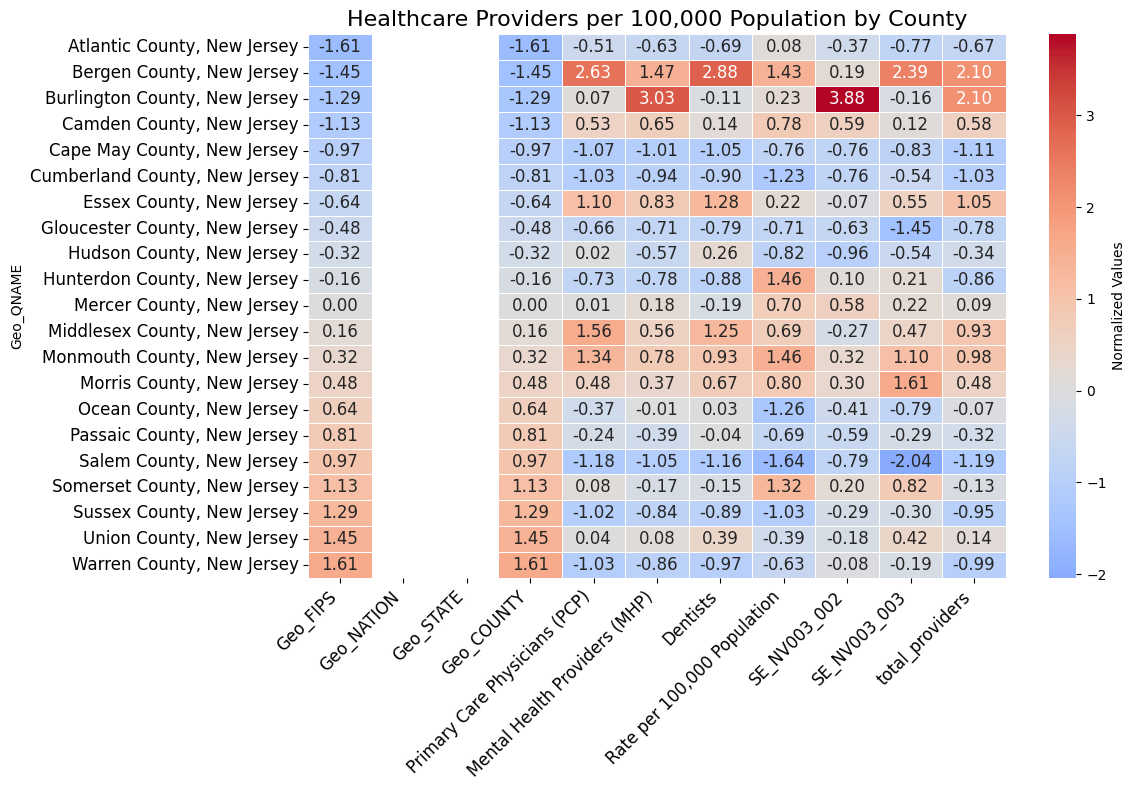

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check the column names and types to ensure we're selecting the correct columns for normalization
print(health_providers.dtypes)
print(health_providers.head())

# Ensure that the 'County' column is set as the index
health_providers.set_index('Geo_QNAME', inplace=True)

# Select the numeric columns to normalize (assuming healthcare provider data is numeric)
numeric_columns = health_providers.select_dtypes(include=['float64', 'int64']).columns

# Normalize only the numeric columns
health_providers_normalized = (health_providers[numeric_columns] - health_providers[numeric_columns].mean()) / health_providers[numeric_columns].std()

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(health_providers_normalized, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, center=0,
            cbar_kws={'label': 'Normalized Values'}, annot_kws={"size": 12})

# Add titles and axis labels
plt.title('Healthcare Providers per 100,000 Population by County', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


In [78]:
print(nj_counties.shape)
print(nj_counties.head())


(0, 46)
Empty GeoDataFrame
Columns: [OBJECTID, GLOBALID, COUNTY, COUNTY_LAB, CO, GNIS_NAME, GNIS, FIPSSTCO, FIPSCO, ACRES, SQ_MILES, POP2020, POP2010, POP2000, POP1990, POP1980, POPDEN2020, POPDEN2010, POPDEN2000, POPDEN1990, POPDEN1980, REGION, Shape_Leng, Shape_Area, geometry, County_name, base_estimate, 2020, 2021, 2022, _merge, County_x, Life Expectancy (Asian)_x, Life Expectancy (Black)_x, Life Expectancy (Hispanic)_x, Life Expectancy (White)_x, County_y, Life Expectancy (Asian)_y, Life Expectancy (Black)_y, Life Expectancy (Hispanic)_y, Life Expectancy (White)_y, County, Life Expectancy (Asian), Life Expectancy (Black), Life Expectancy (Hispanic), Life Expectancy (White)]
Index: []

[0 rows x 46 columns]


<Figure size 500x500 with 0 Axes>

<BarContainer object of 21 artists>

Text(0.5, 0, 'County')

Text(0, 0.5, '# Death Rate')

Text(0.5, 1.0, 'Premature Deaths Between 2018 and 2020 (per County)')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
 [Text(0, 0, 'ATLANTIC'),
  Text(1, 0, 'BERGEN'),
  Text(2, 0, 'BURLINGTON'),
  Text(3, 0, 'CAMDEN'),
  Text(4, 0, 'CAPE MAY'),
  Text(5, 0, 'CUMBERLAND'),
  Text(6, 0, 'ESSEX'),
  Text(7, 0, 'GLOUCESTER'),
  Text(8, 0, 'HUDSON'),
  Text(9, 0, 'HUNTERDON'),
  Text(10, 0, 'MERCER'),
  Text(11, 0, 'MIDDLESEX'),
  Text(12, 0, 'MONMOUTH'),
  Text(13, 0, 'MORRIS'),
  Text(14, 0, 'OCEAN'),
  Text(15, 0, 'PASSAIC'),
  Text(16, 0, 'SALEM'),
  Text(17, 0, 'SOMERSET'),
  Text(18, 0, 'SUSSEX'),
  Text(19, 0, 'UNION'),
  Text(20, 0, 'WARREN')])

(array([    0.,  2000.,  4000.,  6000.,  8000., 10000., 12000.]),
 [Text(0, 0.0, '0'),
  Text(0, 2000.0, '2000'),
  Text(0, 4000.0, '4000'),
  Text(0, 6000.0, '6000'),
  Text(0, 8000.0, '8000'),
  Text(0, 10000.0, '10000'),
  Text(0, 12000.0, '12000')])

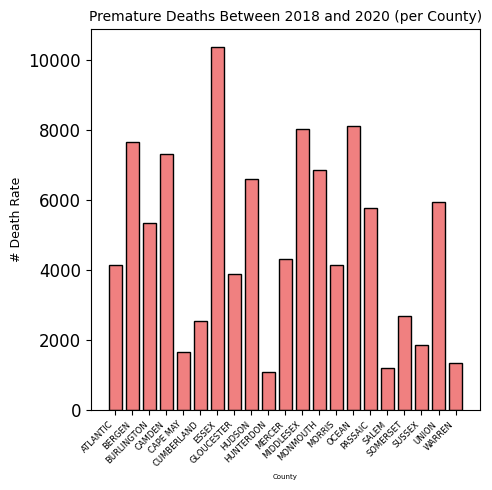

In [93]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 5))  # Increase figure size for better clarity
plt.bar(add_measures['County'], add_measures['# Deaths'], color='#F08080', edgecolor='black')  # Adding edge color for bars
plt.xlabel('County', fontsize=5)  # Increase font size for x-label
plt.ylabel('# Death Rate', fontsize=9)  # Increase font size for y-label
plt.title('Premature Deaths Between 2018 and 2020 (per County)', fontsize=10)  # Increase font size for title
plt.xticks(rotation=45, ha='right', fontsize=6)  # Rotate x-axis labels and adjust font size
plt.yticks(fontsize=12)  # Adjust y-axis tick labels font size
plt.tight_layout()  # Adjust layout to ensure everything fits well
plt.show()


In [94]:
! wget -q -O health.xlsx https://drive.google.com/uc?id=1JE02k3LdzjEfpKfwJFPFEJxcEyNJqEC9&export=download

# Now read the Excel file into a DataFrame
sub_ranks = pd.read_excel('health.xlsx', skiprows=2)

In [96]:
sub_ranks= sub_ranks[['Unnamed: 2','Unnamed: 7','Unnamed: 8']]
sub_ranks= sub_ranks.iloc[0:,:]
#sub_ranks

In [97]:
sub_ranks.rename(columns={'Unnamed: 2': 'County'}, inplace=True)
sub_ranks.rename(columns={'Unnamed: 7': 'Z-Score'}, inplace=True)
sub_ranks.rename(columns={'Unnamed: 8': 'Rank'}, inplace=True)

In [99]:
sub_ranks.head(5)

,County,Z-Score,Rank
0,Atlantic,0.28,19
1,Bergen,-0.31,3
2,Burlington,-0.06,9
3,Camden,0.17,17
4,Cape May,0.18,18


<Figure size 800x600 with 0 Axes>

<Axes: xlabel='County', ylabel='Rank'>

Text(0.5, 1.0, 'Rankings of Counties based on Health Behaviors')

Text(0.5, 0, 'County')

Text(0, 0.5, 'Rank')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
 [Text(0, 0, 'Atlantic'),
  Text(1, 0, 'Bergen'),
  Text(2, 0, 'Burlington'),
  Text(3, 0, 'Camden'),
  Text(4, 0, 'Cape May'),
  Text(5, 0, 'Cumberland'),
  Text(6, 0, 'Essex'),
  Text(7, 0, 'Gloucester'),
  Text(8, 0, 'Hudson'),
  Text(9, 0, 'Hunterdon'),
  Text(10, 0, 'Mercer'),
  Text(11, 0, 'Middlesex'),
  Text(12, 0, 'Monmouth'),
  Text(13, 0, 'Morris'),
  Text(14, 0, 'Ocean'),
  Text(15, 0, 'Passaic'),
  Text(16, 0, 'Salem'),
  Text(17, 0, 'Somerset'),
  Text(18, 0, 'Sussex'),
  Text(19, 0, 'Union'),
  Text(20, 0, 'Warren')])

(array([ 0. ,  2.5,  5. ,  7.5, 10. , 12.5, 15. , 17.5, 20. , 22.5]),
 [Text(0, 0.0, '0.0'),
  Text(0, 2.5, '2.5'),
  Text(0, 5.0, '5.0'),
  Text(0, 7.5, '7.5'),
  Text(0, 10.0, '10.0'),
  Text(0, 12.5, '12.5'),
  Text(0, 15.0, '15.0'),
  Text(0, 17.5, '17.5'),
  Text(0, 20.0, '20.0'),
  Text(0, 22.5, '22.5')])

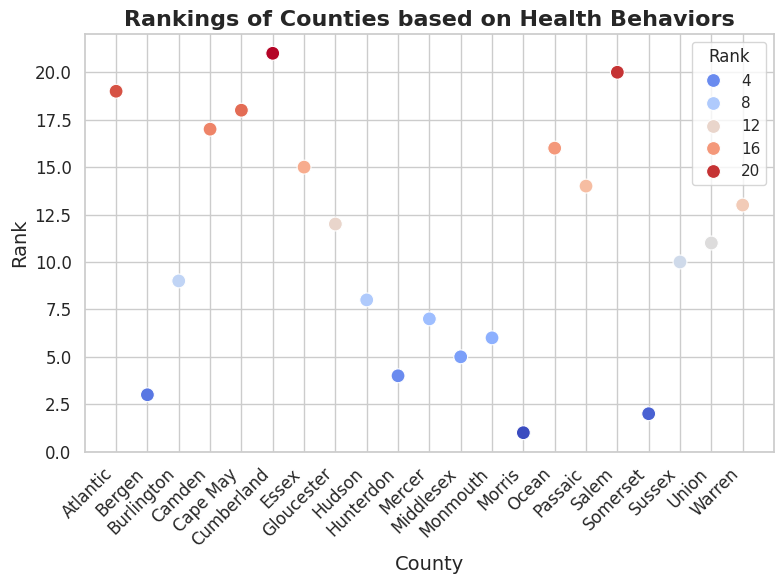

In [109]:
import matplotlib.pyplot as plt
import seaborn as sns

# Using Seaborn for styling
sns.set(style="whitegrid")

# Scatter plot: Rank vs. County
plt.figure(figsize=(8, 6))
sns.scatterplot(data=sub_ranks, x='County', y='Rank', hue='Rank', palette='coolwarm', s=100, marker='o')

# Title and labels
plt.title('Rankings of Counties based on Health Behaviors', fontsize=16, fontweight='bold')
plt.xlabel('County', fontsize=14)
plt.ylabel('Rank', fontsize=14)

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


# 1.

In [110]:
! wget -q -O provider.csv https://drive.google.com/uc?id=1NzJ60zNWiky6reKAwDRYpZTers2jwCPq&export=download

# Now read the Excel file into a DataFrame
health_providers = pd.read_csv('provider.csv')

In [111]:
health_providers= health_providers[['County','Primary Care Physicians (PCP)','Mental Health Providers (MHP)',
                      'Dentists','Rate per 100,000 Population' ]]


In [112]:
health_providers['County'] = health_providers['County'].str.replace('County','', regex=True)
health_providers['County'] = health_providers['County'].str.upper()

In [113]:
health_providers['total_providers'] =(health_providers['Primary Care Physicians (PCP)'] + health_providers['Mental Health Providers (MHP)']
+health_providers['Dentists'])

In [114]:
health_providers.rename(columns={'County': 'Geo_Name'}, inplace=True)

In [115]:
health_providers.dtypes

,0
Geo_Name,object
Primary Care Physicians (PCP),int64
Mental Health Providers (MHP),int64
Dentists,int64
"Rate per 100,000 Population",float64
total_providers,int64


In [116]:
health_providers['Geo_Name'] = health_providers['Geo_Name'].str.rstrip()
health_providers['Geo_Name'] = health_providers['Geo_Name'].str.lstrip()

In [118]:
health_providers.head(5)

,Geo_Name,Primary Care Physicians (PCP),Mental Health Providers (MHP),Dentists,"Rate per 100,000 Population",total_providers
0,ATLANTIC,211,519,165,80.24,895
1,BERGEN,1110,2765,1263,119.30,5138
2,BURLINGTON,377,4425,343,84.42,5145
3,CAMDEN,509,1890,421,100.43,2820
4,CAPE MAY,51,115,56,55.71,222


<Figure size 1000x600 with 0 Axes>

<Axes: ylabel='Geo_Name'>

Text(0.5, 1.0, 'Comparison of PCP and MHP by County')

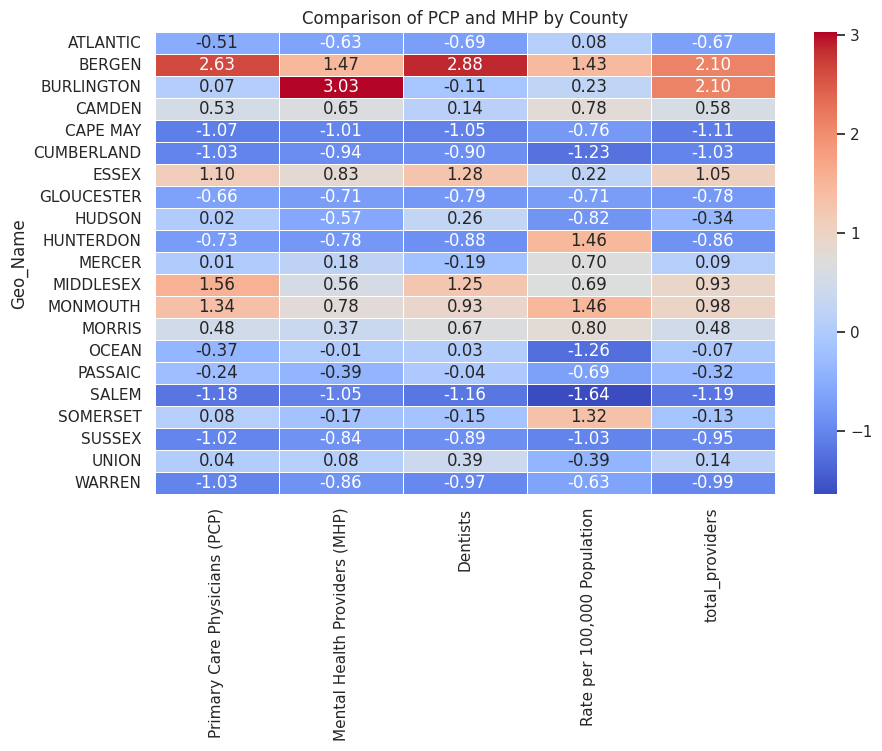

In [119]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set 'County' as the index for better visualization
health_providers.set_index('Geo_Name', inplace=True)

# Normalize the data (optional, but it helps in comparing values on the same scale)
health_providers_normalized = (health_providers - health_providers.mean()) / health_providers.std()

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(health_providers_normalized, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Comparison of PCP and MHP by County')
plt.show()


In [120]:
# Drop the existing '_merge' column if it exists in nj_counties
if '_merge' in nj_counties.columns:
    nj_counties = nj_counties.drop('_merge', axis=1)

# Perform the merge
nj_counties = pd.merge(
    left=nj_counties,
    right=health_providers,
    left_on='COUNTY',
    right_on='Geo_Name',
    how='outer',
    indicator=True
)

# 2.

In [128]:
! wget -q -O insurance.csv https://drive.google.com/uc?id=1fFl__gFmCCxlzTrrqJCCKTkYA0fY042m&export=download

# Now read the Excel file into a DataFrame
health_insurance = pd.read_csv('insurance.csv', skiprows=0)

In [129]:
health_insurance['Geo_NAME'] = health_insurance['Geo_NAME'].str.rstrip()
health_insurance['Geo_NAME'] = health_insurance['Geo_NAME'].str.lstrip()

In [130]:
health_insurance= health_insurance[['Geo_NAME','Persons Without Insurance (Population Under 65 Years, 2013 est.)']]

In [131]:
health_insurance['Geo_NAME'] = health_insurance['Geo_NAME'].str.replace('County','', regex=True)
health_insurance['Geo_NAME'] = health_insurance['Geo_NAME'].str.upper()

In [132]:
health_insurance['Geo_NAME'] = health_insurance['Geo_NAME'].str.strip()

In [134]:
health_insurance.head(5)

,Geo_NAME,"Persons Without Insurance (Population Under 65 Years, 2013 est.)"
0,ATLANTIC,12.95
1,BERGEN,10.12
2,BURLINGTON,7.01
3,CAMDEN,10.01
4,CAPE MAY,10.76


In [135]:
# Drop the existing '_merge' column if it exists in nj_counties
if '_merge' in nj_counties.columns:
    nj_counties = nj_counties.drop('_merge', axis=1)

# Perform the merge
nj_counties = pd.merge(
    left=nj_counties,
    right=health_insurance,
    left_on='COUNTY',
    right_on='Geo_NAME',
    how='outer',
    indicator=True
)

In [137]:
nj_counties[['COUNTY','Geo_NAME','_merge']].head(5)

,COUNTY,Geo_NAME,_merge
0,NaN,ATLANTIC,right_only
1,NaN,BERGEN,right_only
2,NaN,BURLINGTON,right_only
3,NaN,CAMDEN,right_only
4,NaN,CAPE MAY,right_only


In [141]:
if 'Persons Without Insurance (Population Under 65 Years, 2013 est.)' not in nj_counties.columns:
    print("Column not found!")
# Ensure that the column is numeric (float or int)
nj_counties['Persons Without Insurance (Population Under 65 Years, 2013 est.)'] = pd.to_numeric(
    nj_counties['Persons Without Insurance (Population Under 65 Years, 2013 est.)'], errors='coerce')
# Drop rows with NaN values in the relevant column
nj_counties = nj_counties.dropna(subset=['Persons Without Insurance (Population Under 65 Years, 2013 est.)'])

In [144]:
nj_counties.dtypes

,0
OBJECTID,float64
GLOBALID,object
COUNTY,object
COUNTY_LAB,object
CO,object
GNIS_NAME,object
GNIS,object
FIPSSTCO,object
FIPSCO,object
ACRES,float64


In [151]:
# Convert to int64 if appropriate (check your data first)
nj_counties['Persons Without Insurance (Population Under 65 Years, 2013 est.)'] = nj_counties['Persons Without Insurance (Population Under 65 Years, 2013 est.)'].astype('int64')

TypeError: Cannot cast array data from dtype('float64') to dtype('int64') according to the rule 'safe'

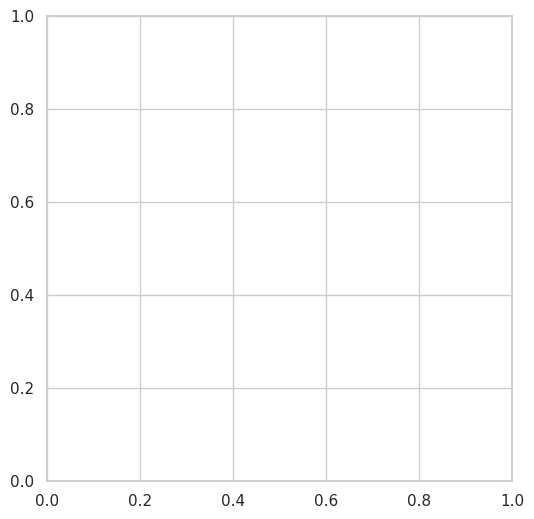

In [153]:
#error
fig, ax = plt.subplots(1, figsize=(6,10))
nj_counties.plot(ax=ax,column='Persons Without Insurance (Population Under 65 Years, 2013 est.)',legend=True,cmap='YlGnBu_r',scheme='quantiles',k=5,
         edgecolor='grey',linewidth=1,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4})
ax.title.set_text("Number of people without insurance(%)")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks

# 3.

In [155]:
! wget -q -O diet.csv https://drive.google.com/uc?id=1ZXrrUkUvvoSU9ityDd1kazCSpjfyLRs4&export=download

# Now read the Excel file into a DataFrame
diet_excercise = pd.read_csv('diet.csv')

In [156]:
# Assuming 'df' is the name of your DataFrame
diet_excercise.columns = diet_excercise.columns.str.strip()


In [157]:
diet_excercise = diet_excercise[['County',
                                 'Persons with Limited Access to Healthy Foods',
                                 'Persons with Access to Exercise Opportunities',
                                 'Obese Persons (20 Years and Over)',
                                 'Physically Inactive Persons (20 Years and Over)']]


In [158]:
diet_excercise['County'] = diet_excercise['County'].str.replace('County', '', regex=True)

In [160]:
diet_excercise.head(5)

,County,Persons with Limited Access to Healthy Foods,Persons with Access to Exercise Opportunities,Obese Persons (20 Years and Over),Physically Inactive Persons (20 Years and Over)
0,Atlantic,7.82,93.12,32.40,22.50
1,Bergen,0.89,99.46,22.90,18.20
2,Burlington,5.03,93.03,30.00,18.40
3,Camden,4.45,93.52,30.90,21.90
4,Cape May,8.74,89.72,29.40,19.20


<Figure size 800x400 with 0 Axes>

<BarContainer object of 21 artists>

Text(0.5, 0, 'County')

Text(0, 0.5, 'Persons with Limited Access to Healthy Foods')

Text(0.5, 1.0, 'Persons with Limited Access to Healthy Foods(percent)')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
 [Text(0, 0, 'Atlantic '),
  Text(1, 0, 'Bergen '),
  Text(2, 0, 'Burlington '),
  Text(3, 0, 'Camden '),
  Text(4, 0, 'Cape May '),
  Text(5, 0, 'Cumberland '),
  Text(6, 0, 'Essex '),
  Text(7, 0, 'Gloucester '),
  Text(8, 0, 'Hudson '),
  Text(9, 0, 'Hunterdon '),
  Text(10, 0, 'Mercer '),
  Text(11, 0, 'Middlesex '),
  Text(12, 0, 'Monmouth '),
  Text(13, 0, 'Morris '),
  Text(14, 0, 'Ocean '),
  Text(15, 0, 'Passaic '),
  Text(16, 0, 'Salem '),
  Text(17, 0, 'Somerset '),
  Text(18, 0, 'Sussex '),
  Text(19, 0, 'Union '),
  Text(20, 0, 'Warren ')])

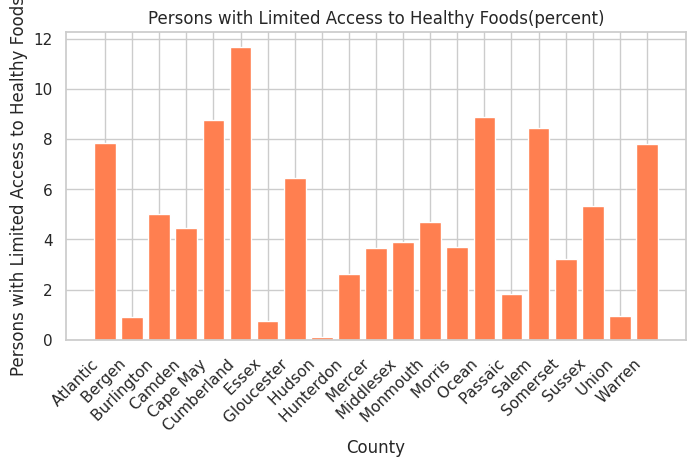

In [165]:
# Create a bar graph
plt.figure(figsize=(8, 4))
plt.bar(diet_excercise['County'], diet_excercise['Persons with Limited Access to Healthy Foods'], color='coral')
plt.xlabel('County')
plt.ylabel('Persons with Limited Access to Healthy Foods')
plt.title('Persons with Limited Access to Healthy Foods(percent)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()